In [1]:
from typing import Annotated
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages

In [2]:
#first work to create state:
class BlogState(TypedDict):
    input:Annotated[list,add_messages]

In [3]:
#importing the environment variables----
import os 
from dotenv import load_dotenv
load_dotenv()
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')

In [4]:
from langchain_groq import ChatGroq

In [5]:
llm=ChatGroq(model="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000029577884E30>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000029577885E80>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
llm.invoke("hello")

AIMessage(content='Hello! 👋 \n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 11, 'total_tokens': 27, 'completion_time': 0.029090909, 'prompt_time': 0.001914507, 'queue_time': 0.019661151, 'total_time': 0.031005416}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-0a16679a-b37d-49c1-8569-50aa4d96e385-0', usage_metadata={'input_tokens': 11, 'output_tokens': 16, 'total_tokens': 27})

#### till now we have done with invoking llm and all now we will buid our graph and define the nodes means node names with their functionality.

In [7]:
from langchain_core.messages import HumanMessage, SystemMessage

# System message : this is same as like giving prompt to our llm.
sys_msg1 = SystemMessage(content="You are a helpful assistant tasked with generating one blog title.")

# System message
sys_msg2 = SystemMessage(content="You are a helpful assistant tasked with writing blogs with 1500 words with not more than 4 paragaph and in very accurate manner.")


def title_generator(state:BlogState):
    return {"input":[llm.invoke([sys_msg1] + state["input"])]}

def content_generator(state:BlogState):
    return {"input":[llm.invoke([sys_msg2] + state["input"])]}

##### in above cell nodes are defined. now in below cells lets code for building graph.

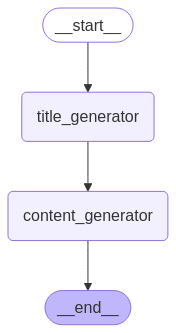

In [8]:
from langgraph.graph import START, StateGraph, END
from IPython.display import Image, display

builder=StateGraph(BlogState)

## Define the node
builder.add_node("title_generator",title_generator)
builder.add_node("content_generator",content_generator)

## Define the edges
builder.add_edge(START,"title_generator")
builder.add_edge("title_generator","content_generator")

## Add the final node
builder.add_edge("content_generator", END)

react_graph=builder.compile() #final builded graph object.

# Show
display(Image(react_graph.get_graph().draw_mermaid_png()))

##### All is done now I will check that our application is working fine or not.

In [9]:
messages=[HumanMessage(content="How can femisim affects our indian society.")]
messages=react_graph.invoke({"input":messages})

In [10]:
for m in messages['input']:
    m.pretty_print()

================================ Human Message =================================

How can femisim affects our indian society.
================================== Ai Message ==================================

##  Breaking Barriers: How Feminism is Shaping a More Equitable India
================================== Ai Message ==================================

 
Feminism, the fight for social, political, and economic equality for all genders, is a powerful force that is reshaping societies worldwide. In India, a nation rich in tradition and deeply rooted in patriarchal norms, feminism is a particularly potent force, challenging long-standing societal structures and paving the way for a more equitable future.  While the concept of feminism might seem foreign to some, its impact on Indian society is undeniable, permeating various facets of life and sparking a much-needed conversation about gender equality. 

One of the most significant ways feminism is affecting India is through its impact 

In [11]:
### another trial
messages=[HumanMessage(content="what is effect of AI in healthcare.")]
messages=react_graph.invoke({"input":messages})

In [12]:
for m in messages['input']:
    m.pretty_print()

================================ Human Message =================================

what is effect of AI in healthcare.
================================== Ai Message ==================================

##  AI: The Doctor Will See You Now -  Revolutionizing Healthcare with Artificial Intelligence
================================== Ai Message ==================================

Artificial intelligence (AI) is rapidly transforming numerous industries, and healthcare is no exception. Its potential to analyze vast datasets, identify patterns, and automate tasks is revolutionizing patient care, medical research, and administrative processes. From diagnosing diseases to personalizing treatment plans, AI is poised to become an indispensable tool in the medical field, ushering in an era of more efficient, accessible, and effective healthcare.

One of the most significant impacts of AI in healthcare is in diagnostics. AI algorithms can analyze medical images like X-rays, CT scans, and MRIs with re

In [13]:
#done.